## MathView
- organizar as funcoes q voce criou e documentar em um notebook
- Verificar se é util plotar as expressoes no lugar dos labels no plot em arvore

In [1]:
from adapt_utils import replace_symbols
from my_utils import print_proof_props_graph, get_proof_steps, print_ident_proof, print_proof_linear_steps

from tree_parser import *

import networkx as nx

import matplotlib
import matplotlib.pyplot as plt

import copy

import time

from collections import Counter

In [7]:
%%time

text = file_contents()
database = meta_math_database(text,n=10000)
print("")

included 5555695 tokens from set.mm
proposition: 10000
Wall time: 3min 30s


In [8]:
def repsym(p):
    return replace_symbols(" ".join(p.statement))

In [10]:
i = 8000

for p in database.propositions_list[i:i+100]:
    print(p.label, repsym(p))

rneqdmfinf1o |- ( ( A ∈ Fin ∧ F Fn A ∧ ran F = A ) → F : A -1-1-onto→ A )
fidomdm |- ( F ∈ Fin → dom F ≺_ F )
dmfi |- ( A ∈ Fin → dom A ∈ Fin )
fundmfibi |- ( Fun F → ( F ∈ Fin ↔ dom F ∈ Fin ) )
cnvfi |- ( A ∈ Fin → `' A ∈ Fin )
rnfi |- ( A ∈ Fin → ran A ∈ Fin )
f1dmvrnfibi |- ( ( A ∈ V ∧ F : A -1-1→ B ) → ( F ∈ Fin ↔ ran F ∈ Fin ) )
f1vrnfibi |- ( ( F ∈ V ∧ F : A -1-1→ B ) → ( F ∈ Fin ↔ ran F ∈ Fin ) )
fofi |- ( ( A ∈ Fin ∧ F : A -onto→ B ) → B ∈ Fin )
f1fi |- ( ( B ∈ Fin ∧ F : A -1-1→ B ) → A ∈ Fin )
iunfi |- ( ( A ∈ Fin ∧ ∀ x ∈ A B ∈ Fin ) → ∪ x ∈ A B ∈ Fin )
unifi |- ( ( A ∈ Fin ∧ A ⊆ Fin ) → U. A ∈ Fin )
unifi2 |- ( ( A ≺ _om ∧ ∀ x ∈ A x ≺ _om ) → U. A ≺ _om )
infssuni |- ( ( ¬ A ∈ Fin ∧ B ∈ Fin ∧ A ⊆ U. B ) → ∃ x ∈ B ¬ ( A ∩ x ) ∈ Fin )
unirnffid |- ( 𝜑 → U. ran F ∈ Fin )
imafi |- ( ( Fun F ∧ X ∈ Fin ) → ( F " X ) ∈ Fin )
pwfilem |- ( 𝒫 b ∈ Fin → 𝒫 ( b ∪ { x } ) ∈ Fin )
pwfi |- ( A ∈ Fin ↔ 𝒫 A ∈ Fin )
mapfi |- ( ( A ∈ Fin ∧ B ∈ Fin ) → ( A ^m B ) ∈ Fin )
ixpfi |- ( ( A ∈ Fin ∧ ∀ 

In [3]:
" ".join(database.propositions['elvvuni'].statement)

'|- ( A e. ( _V X. _V ) -> U. A e. A )'

In [4]:
database.propositions_list[-2].label

'elvvuni'

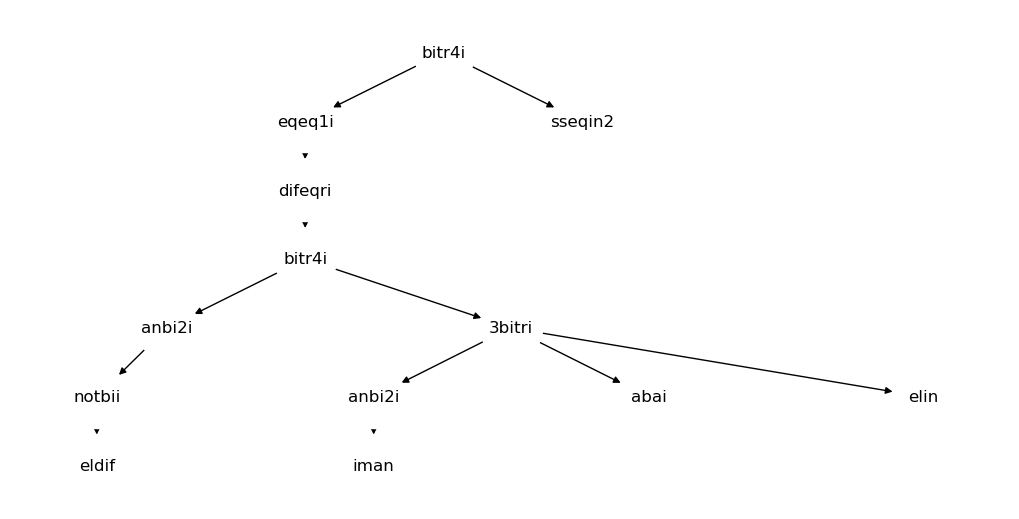

In [12]:
print_proof_props_graph('dfss4', database)

In [6]:
print_ident_proof('dfss2', database, max_depth=1)

[1] dfss2 - |- ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )
 | [1] dfss - |- ( A ⊆ B ↔ A = ( A ∩ B ) )
 | [1] df-in - |- ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }
 | [1] eqeq2i - |- ( C = A ↔ C = B )
 | [1] abeq2 - |- ( A = { x | 𝜑 } ↔ ∀ x ( x ∈ A ↔ 𝜑 ) )
 | [1] 3bitri - |- ( 𝜑 ↔ 𝜃 )
 | [1] pm4.71 - |- ( ( 𝜑 → 𝜓 ) ↔ ( 𝜑 ↔ ( 𝜑 ∧ 𝜓 ) ) )
 | [1] albii - |- ( ∀ x 𝜑 ↔ ∀ x 𝜓 )
 | [1] bitr4i - |- ( 𝜑 ↔ 𝜒 )


In [7]:
print_proof_linear_steps("dfss2", database)

[dfss] |- ( A ⊆ B ↔ A = ( A ∩ B ) )
[df-in] |- ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }
[eqeq2i] |- ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } )
[abeq2] |- ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )
[3bitri] |- ( A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )
[pm4.71] |- ( ( x ∈ A → x ∈ B ) ↔ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )
[albii] |- ( ∀ x ( x ∈ A → x ∈ B ) ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )
[bitr4i] |- ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )


In [8]:
# show proof expressions

In [10]:
database.propositions["dfss2"].entails_proof_steps

In [ ]:
database.propositions["dfss2"].entails_proof_steps[0].prop.label